In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn import set_config

set_config(display="diagram")

In [127]:
vehicles = pd.read_csv('data/vehicles.csv')

In [128]:
df = pd.read_csv('data/vehicles.csv')

In [129]:
df1 = pd.read_csv('data/vehicles.csv')

In [130]:
vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [131]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          426880 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [132]:
# """Reindexing DataFrame so that price feature will at last"""
vehicles= vehicles.reindex(columns=['id', 'region', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'state'])

In [133]:
#Removed any columns that are not required
vehicles1=vehicles.copy()
vehicles1=vehicles1.drop(columns=['VIN','state'])
vehicles1.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
vehicles1.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel                 0
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
dtype: int64

In [135]:
df.dropna(subset=['year'], inplace=True)
df.isnull().sum()

id                   0
region               0
price                0
year                 0
manufacturer     16447
model             5209
condition       172909
cylinders       177591
fuel                 0
odometer          4331
title_status      7930
transmission      2488
VIN             160974
drive           130267
size            305156
type             92667
paint_color     130048
state                0
dtype: int64

In [136]:
#define numeric variable and categorical variable to work separatly on them
num_col=['year','odometer']
cat_cols=['region','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']

In [137]:
df2=vehicles.sample(1000)
df2.shape

(1000, 18)

C:\Users\yadavm3\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\yadavm3\AppData\Local\Temp\ipykernel_37032\3584636538.py:3: UserWarning:

The figure layout has changed to tight



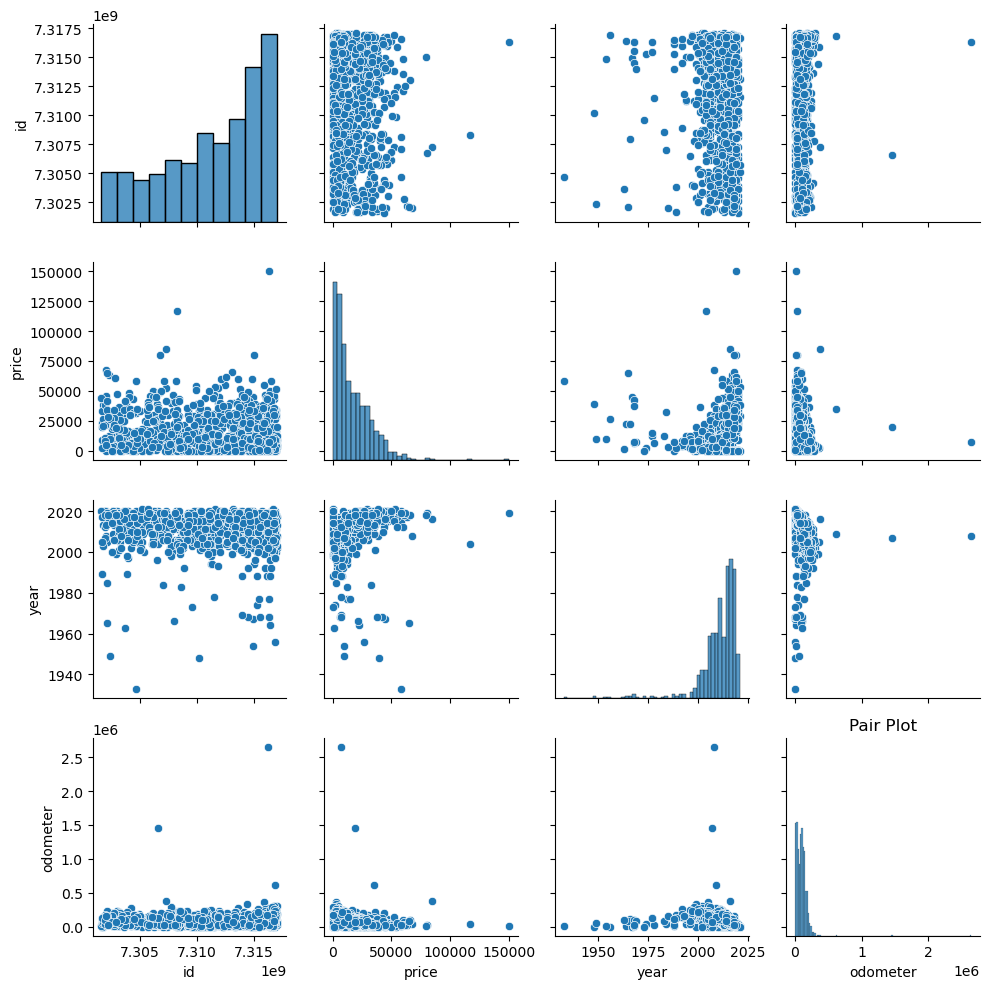

In [138]:
sns.pairplot(df2)
plt.title('Pair Plot')
plt.tight_layout()
plt.show()

In [20]:
vehicles['fuel'].value_counts()

fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64

In [139]:
df['year']=df['year'].astype('int64')
df.drop(['id'],axis=1,inplace=True)
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
27,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al
28,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
29,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al
30,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al
31,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al


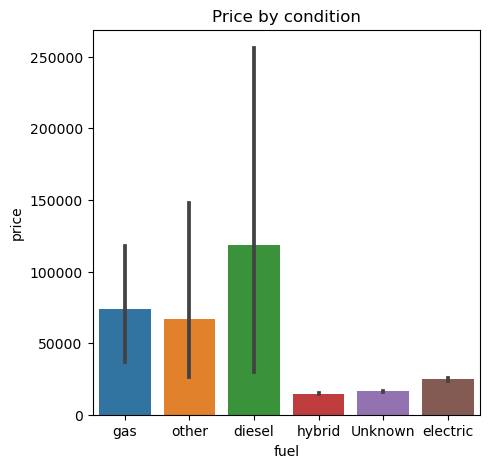

In [140]:
fig,axs=plt.subplots()
fig.set_size_inches(5,5)

p1=sns.barplot(x='fuel',y='price',data=df,ax=axs)
axs.set_title('Price by condition')

plt.show()

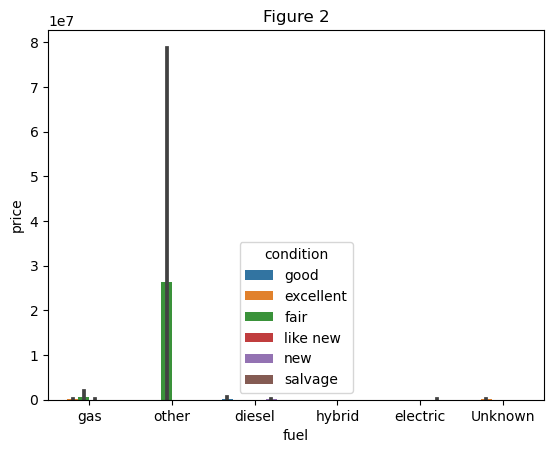

In [141]:

sns.barplot(x='fuel',y='price',hue='condition',data=df.loc[df['condition'].isin(['good','excellent','like new','fair','new','salvage'])])
plt.title('Figure 2')
plt.show()

ValueError: The number of FixedLocator locations (42), usually from a call to set_ticks, does not match the number of labels (43).

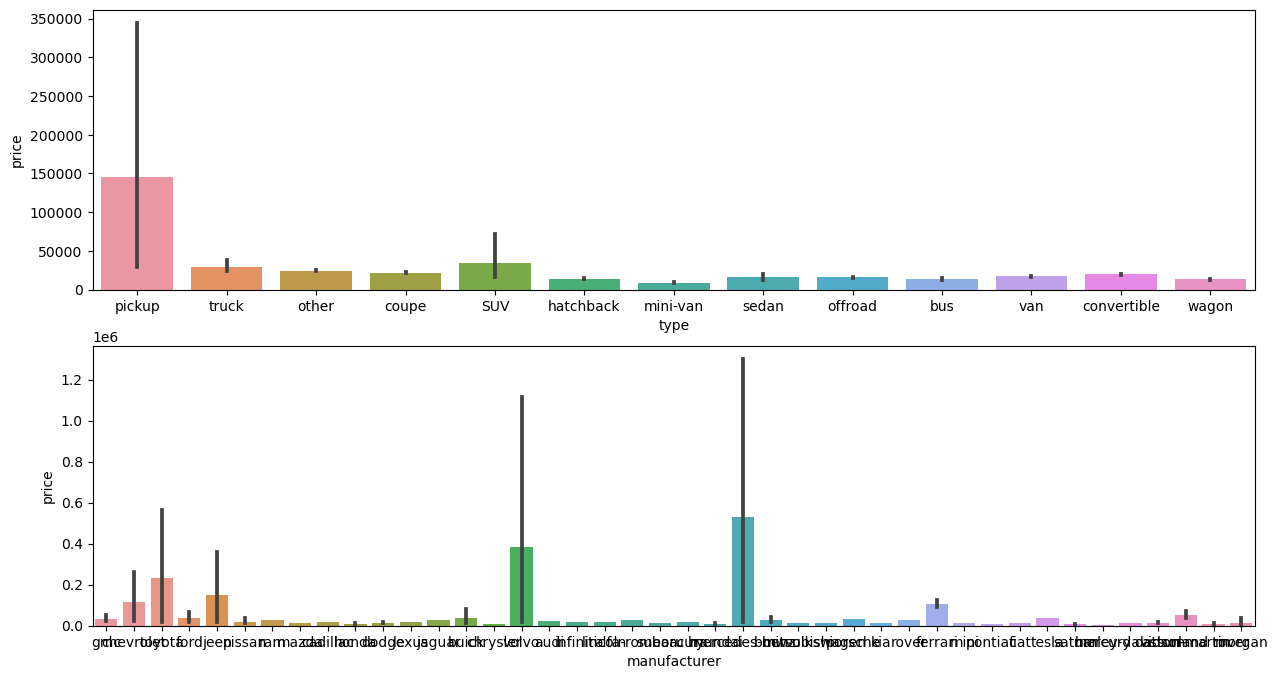

In [121]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(15,8)
sns.barplot(x='type',y='price',data=df,ax=axs[0])
sns.barplot(x='manufacturer',y='price',data=df,ax=axs[1])
axs[1].set_xticklabels(df.manufacturer.unique(),rotation=100)
axs[0].set_title('Vehicle Type')
axs[1].set_title('Manufacturer')
#plt.tight_layout()
plt.show()

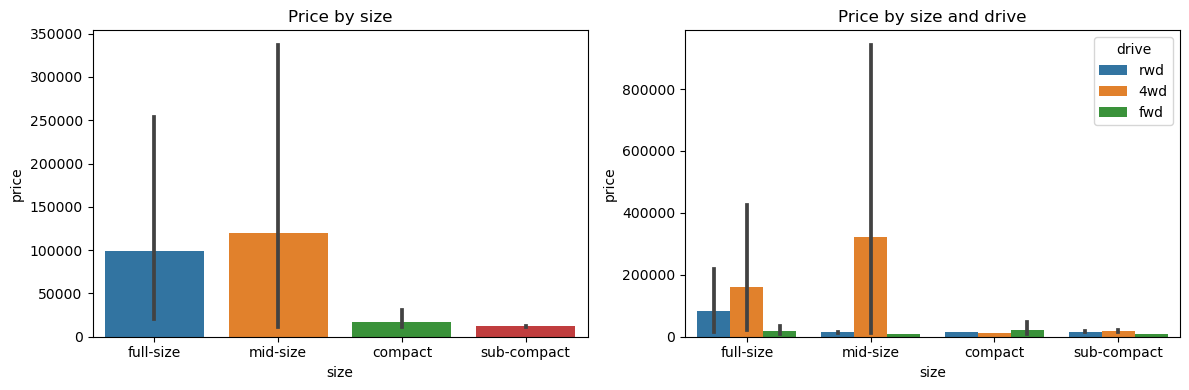

In [125]:
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(12,4)
sns.barplot(x='size',y='price',data=df,ax=axs[0])
sns.barplot(x='size',y='price',hue='drive',data=df,ax=axs[1])
axs[0].set_title('Price by size')
axs[1].set_title('Price by size and drive')
plt.tight_layout()
plt.show()

In [150]:
df.fuel.value_counts()

fuel
gas         355426
other        30717
diesel       29927
hybrid        5165
Unknown       2745
electric      1695
Name: count, dtype: int64

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 425675 entries, 27 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        425675 non-null  object 
 1   price         425675 non-null  int64  
 2   year          425675 non-null  int64  
 3   manufacturer  409228 non-null  object 
 4   model         420466 non-null  object 
 5   condition     252766 non-null  object 
 6   cylinders     248084 non-null  object 
 7   fuel          425675 non-null  object 
 8   odometer      421344 non-null  float64
 9   title_status  417745 non-null  object 
 10  transmission  423187 non-null  object 
 11  VIN           264701 non-null  object 
 12  drive         295408 non-null  object 
 13  size          120519 non-null  object 
 14  type          333008 non-null  object 
 15  paint_color   295627 non-null  object 
 16  state         425675 non-null  object 
dtypes: float64(1), int64(2), object(14)
memory usage: 58